In [9]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


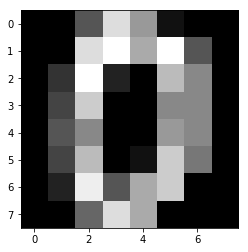

In [10]:
# 读取数据
digits = load_digits()
data = digits.data
print(data.shape)
print(digits.images[0])
print(digits.target[0])
plt.gray()
plt.imshow(digits.images[0])
plt.show()

In [11]:
# 数据划分
train_X, test_X = train_test_split(data, test_size=0.25, random_state=33)
train_y, test_y = train_test_split(digits.target, test_size=0.25, random_state=33)
# 数据标准化
ss = preprocessing.StandardScaler()
train_ss_X = ss.fit_transform(train_X)
test_ss_X = ss.fit_transform(test_X)

In [12]:
# KNN分类器
knn = KNeighborsClassifier()
knn.fit(train_ss_X, train_y)
predict = knn.predict(test_ss_X)
print('KNN准确率：%.4lf' % accuracy_score(predict, test_y))

KNN准确率：0.9756


In [13]:
# SVM分类器
svm = SVC()
svm.fit(train_ss_X, train_y)
predict = svm.predict(test_ss_X)
print('SVM准确率：%.4lf' % accuracy_score(predict, test_y))

KNN准确率：0.9889


In [14]:
# 朴素贝叶斯
# 特征不能为负值，用Min-Max规范化
mm = preprocessing.MinMaxScaler()
train_mm_X = mm.fit_transform(train_X)
test_mm_X = mm.fit_transform(test_X)
nb = MultinomialNB()
nb.fit(train_mm_X, train_y)
predict = nb.predict(test_mm_X)
print('朴素贝叶斯准确率：%.4lf' % accuracy_score(predict, test_y))

朴素贝叶斯准确率：0.8889


In [16]:
# 决策树
dtc = DecisionTreeClassifier()
dtc.fit(train_ss_X, train_y)
predict = dtc.predict(test_ss_X)
print('决策树准确率：%.4lf' % accuracy_score(predict, test_y))

决策树准确率：0.8222
